In [2]:
import dill
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set()

In [4]:
#df = dill.load(open('df_raw.pkd', 'rb'))
#df = dill.load(open('df_features_second_round-0524.pkd', 'rb'))

## Messages over time projected based on lease status  


In [86]:
df_t = df[['channel_id', 'created_at', 'is_lease']]
df_t['date_days'] = df_t['created_at'].dt.strftime('%Y %b %d')
df_t['sort_date'] = df_t['created_at'].dt.strftime('%Y-%m')
df_t['date_month'] = df_t['created_at'].dt.strftime('%Y %b')

df_counts = df_t
counts = df_t.groupby(['is_lease', 'date_month','sort_date'])['channel_id'].count()
df_counts = counts.to_frame(name = 'counts').reset_index()
df_counts['sort_date'] =pd.to_datetime(df_counts.sort_date)

df_sort = df_counts.sort_values(by=['sort_date'])

<ipython-input-86-9bd95c2e373d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['date_days'] = df_t['created_at'].dt.strftime('%Y %b %d')
<ipython-input-86-9bd95c2e373d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['sort_date'] = df_t['created_at'].dt.strftime('%Y-%m')
<ipython-input-86-9bd95c2e373d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

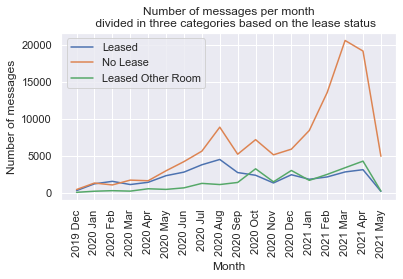

In [114]:
ax = sns.lineplot(data=df_sort,
                  x="date_month",
                  y="counts",
                  hue="is_lease")
ax.set_title('''Number of messages per month
    divided in three categories based on the lease status''')
legend = ax.legend()
ax.set(xlabel='Month', ylabel='Number of messages')

plt.setp(ax.get_xticklabels(), rotation=90);
plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('message_per_month.png')

## Number of messages sent on a daily basis? 

In [83]:
df_counts_days = df_t
counts_days = df_t.groupby(['is_lease', 'date_days'])['channel_id'].count()
df_counts_days = counts_days.to_frame(name = 'counts').reset_index()

In [1]:
ax = sns.lineplot(data=df_counts_days,
                  x="date_days",
                  y="counts")

ax.set_title('Total number of messages per day')
ax.set(xlabel='Day', ylabel='Number of messages')

plt.setp(ax.get_xticklabels(), rotation=90);
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 50 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)
        
plt.savefig('message_per_day.png')
plt.gcf().subplots_adjust(bottom=0.3)
plt.show()

NameError: name 'sns' is not defined

##  Balanced classes for ML model  

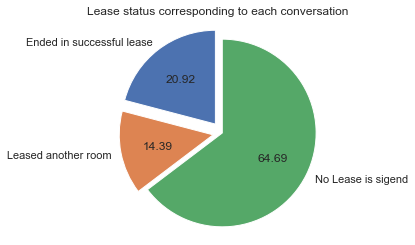

In [89]:
labels = ('Ended in successful lease',
          'Leased another room',
          'No Lease is sigend')

yes = len(df[df['is_lease'] == 'Leased'])
other_yes = len(df[df['is_lease'] == 'Leased Other Room']) 
no = len(df[df['is_lease'] == 'No Lease']) 

share = [yes, other_yes, no]
explode = (0.12, 0.1, 0.0)

figure, ax = plt.subplots()
pies = ax.pie(share,
        labels=labels,
        autopct='%1.2f',
        startangle=90,
        explode=explode)
    
ax.axis('equal')
plt.title('Lease status corresponding to each conversation')
plt.savefig('ml_classes.png')
plt.show()

##  Who is more involved? Applicants or Residents? 

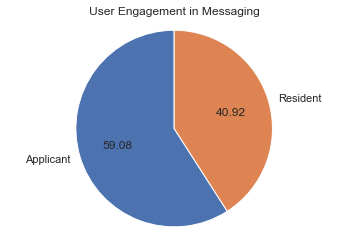

In [116]:
labels = 'Applicant', 'Resident'

yes = len(df[df['is_applicant'] == True])
no = len(df[df['is_applicant'] == False]) 

share = [yes, no]

figure, ax = plt.subplots()
pies = ax.pie(share, labels=labels,autopct='%1.2f',startangle=90)
    
ax.axis('equal')
plt.title('User Engagement in Messaging')

plt.savefig('engagement.png')
plt.show()

##  Sentiment Distribution for messages of the three labels  


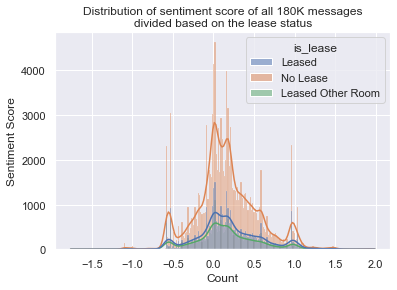

In [115]:
ax = sns.histplot(data=df[df['num_sentence'] > 0],
             x="expected_sentiment_text",
             kde=True,
             hue="is_lease");

ax.set_title('''Distribution of sentiment score of all 180K messages\ndivided based on the lease status''')
ax.set(xlabel='Count', ylabel='Sentiment Score')

plt.savefig('sentiment_distribution.png')